In [268]:
from serde import serde
from serde.json import to_json, from_json
from dataclasses import dataclass
from time import sleep
from scrapping import Voiture
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OneHotEncoder
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import statsmodels

In [269]:
with open("donnees.json", "r") as fichier:
    contenu_fichier = fichier.read()

In [270]:
reconstitution = from_json(list[Voiture],contenu_fichier)

In [271]:
df = pd.DataFrame(reconstitution)
df = df.replace('NA', np.NaN)

In [272]:
df_mod = pd.get_dummies(df["modele"])
df_garkil = pd.get_dummies(df["garantie_kilometrage"])
df_carbu = pd.get_dummies(df["carburant"])
df_bdv = pd.get_dummies(df["boite_de_vitesse"])
df_couleur = pd.get_dummies(df["couleur"])
df_sil = pd.get_dummies(df["silhouette"])
df_trans = pd.get_dummies(df["transmission"])
df_gar = pd.get_dummies(df["garantie"])
df_utilprec = pd.get_dummies(df["utilisation_prec"])

In [273]:
df_cat = pd.concat([df, df_mod, df_garkil, df_carbu, df_bdv, df_couleur, df_sil,df_trans, df_gar, df_utilprec], axis = 1)

In [274]:
del df_cat['modele']
del df_cat['garantie_kilometrage']
del df_cat['carburant']
del df_cat['boite_de_vitesse']
del df_cat['couleur']
del df_cat['silhouette']
del df_cat['transmission']
del df_cat['garantie']
del df_cat['utilisation_prec']

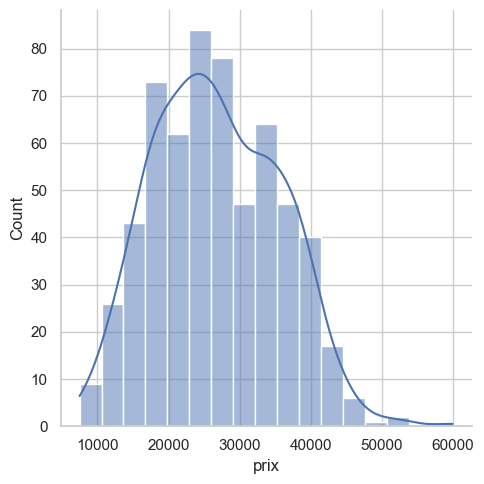

In [304]:
sns.set_theme(style="whitegrid")

sns.displot(data = df_cat, x = "prix", kde = True)

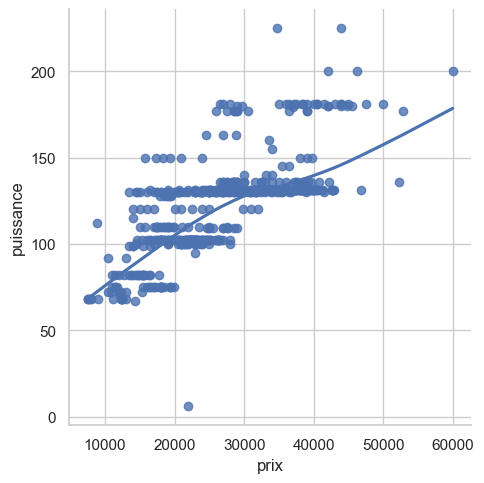

In [276]:
sns.lmplot(data = df_cat, x = 'prix', y='puissance',
lowess = True)

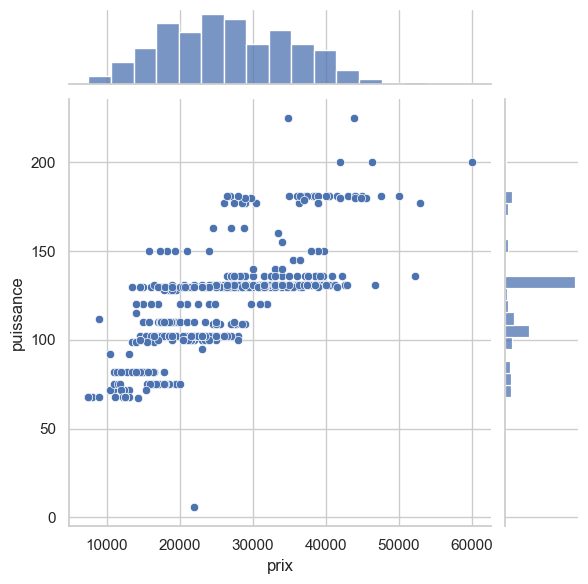

In [277]:
sns.jointplot(data=df_cat, x="prix", y="puissance")

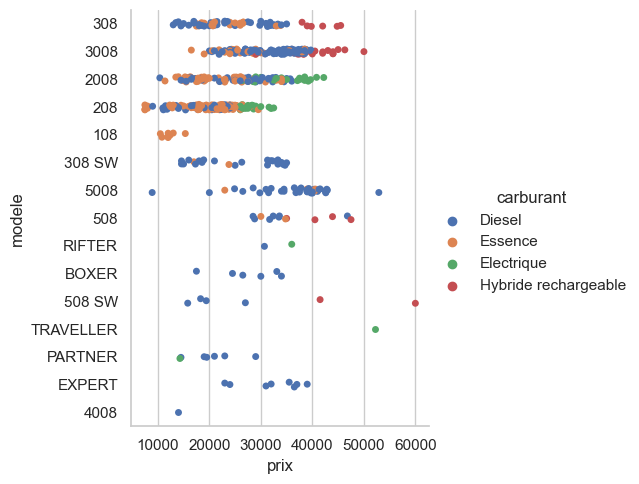

In [283]:
sns.catplot(data=df, x='prix', y='modele', hue='carburant')

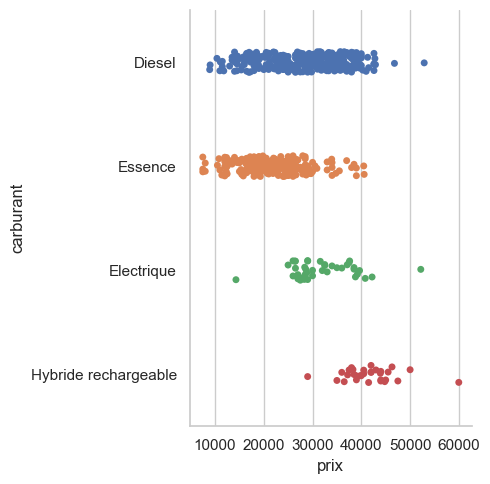

In [285]:
sns.catplot(data=df, x='prix', y='carburant', hue='carburant', legend=False)

<AxesSubplot: xlabel='modele', ylabel='count'>

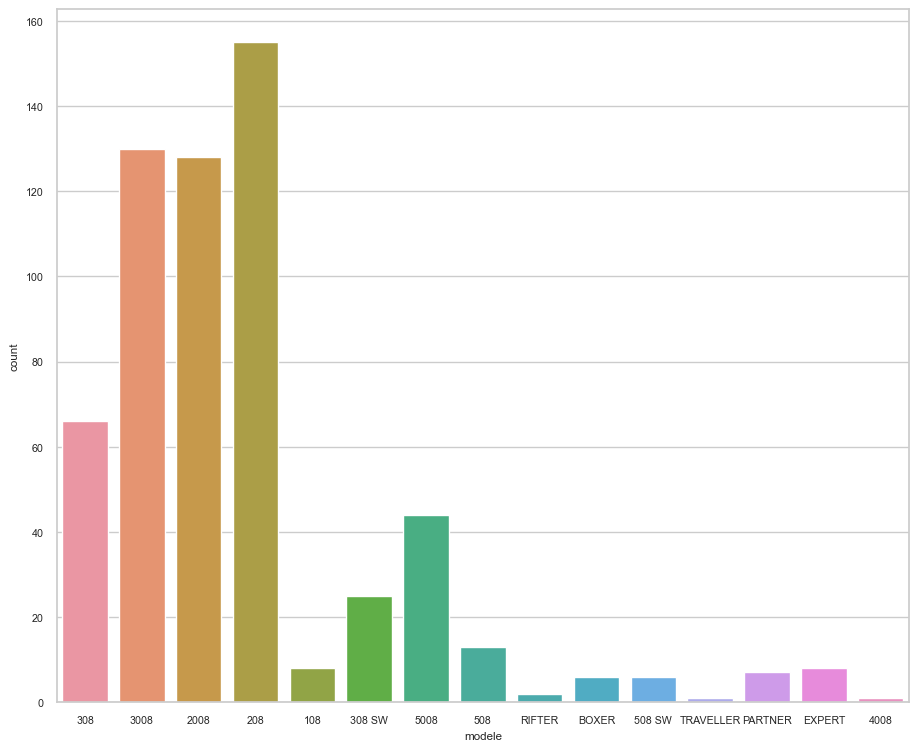

In [295]:
sns.set(rc={'figure.figsize':(11,9)})
sns.set_theme(style='whitegrid', font_scale = 0.7)
sns.countplot(data=df, x = 'modele', order=)

C:\Users\mathi\AppData\Local\Temp\ipykernel_3476\1596314351.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

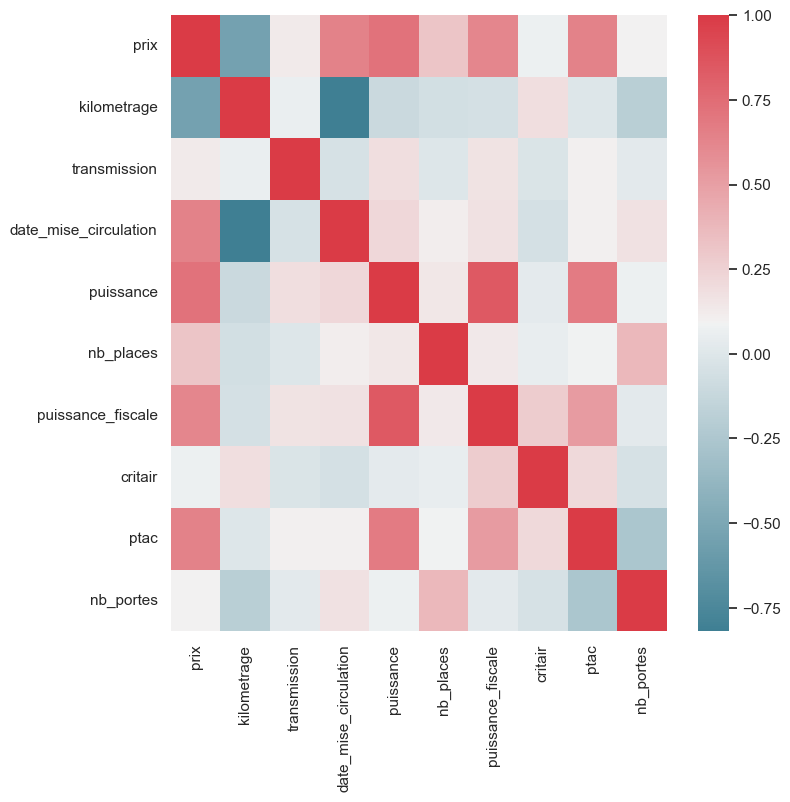

In [302]:
sns.set(rc={'figure.figsize':(8,8)})
corr = df.corr()
sns.heatmap(corr, 
cmap=sns.diverging_palette(220, 10, as_cmap=True))

In [1]:
df

NameError: name 'df' is not defined